In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

#from __future__ import print_function
import os, sys

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['image.cmap'] = 'viridis'

# Output figure directory
figure_dir = "../writeup/figures"
if not os.path.exists(figure_dir):
    raise ValueError("Figure directory does not exist. Create it or change figure_dir above.")

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Useful function from stackoverflow for 3d arrows
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

(-6.0, 6.0, -6.0, 6.0)

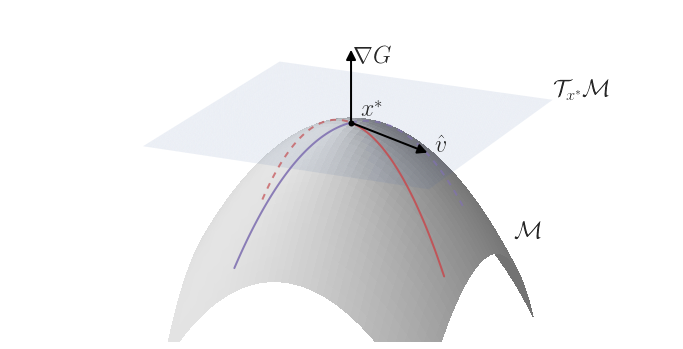

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

colors = sns.color_palette()

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40, -65)

# Define manifold
X = np.linspace(-5, 5, 200)
Y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(X, Y)
vmax = 20
def func(X, Y):
    return vmax-(X**2 + Y**2)

Z = func(X, Y)
ax.set_zlim(-10, 20)

stride = 5

# Draw manifold
h = ax.plot_surface(X, Y, Z,  alpha=1.0, rstride=stride, cstride=stride, linewidth=0, color=[0.9, 0.9, 0.9], shade=True, antialiased=False)

# Draw tangent plane
ax.plot_surface(X, Y, np.ones_like(Z)*20,  alpha=0.1, rstride=1, cstride=1, linewidth=0.0, color=colors[0], shade=False)

# Direction corresponding to kappa_1
v = np.array([2.0, -1])
v = v /  np.linalg.norm(v)

# Plot the geodesic for the first principal curvature
X, Y = np.linspace(0, 5, 100)[None, :] * v[:, None]
Z = func(X, Y)
ax.plot(X, Y, Z, alpha=0.9, c=colors[2], lw=2.0, zorder=9)

X, Y = np.linspace(-5, 0, 100)[None, :] * v[:, None]
Z = func(X, Y)
ax.plot(X, Y, Z, '--', alpha=0.7,c=colors[2], lw=2.0, zorder=9)

# Plot the geodesic for the second principal curvature
if 1:
    v2 = np.array((-v[1], v[0]))
    X, Y = np.linspace(-5, 0, 100)[None, :] * v2[:, None]
    Z = func(X, Y)
    ax.plot(X, Y, Z, alpha=0.9, c=colors[3], lw=2.0, zorder=8)

    X, Y = np.linspace(0, 5, 100)[None, :] * v2[:, None]
    Z = func(X, Y)
    ax.plot(X, Y, Z, '--', alpha=0.7,c=colors[3], lw=2.0, zorder=8)


#xstart, ystart, _ = proj3d.proj_transform(0, 0, vmax, gca().get_proj())
#xend, yend, _ = proj3d.proj_transform(v[0] * 4, v[1] * 4, vmax, gca().get_proj())


# point at x*
ax.plot([0],[0],[vmax+0.01],"ko",markersize=6, zorder=11)

# Velocity arrow        
v = 4 * v
a = Arrow3D([0, v[0]],[0, v[1]],[vmax,vmax], mutation_scale=20, lw=2, arrowstyle="-|>", color="k", zorder=10)
ax.add_artist(a)

# normal arrow
a = Arrow3D([0, 0],[0, 0],[vmax,vmax+15], mutation_scale=20, lw=2, arrowstyle="-|>", color="k", zorder=10)
ax.add_artist(a)

# Annotations
ax.text(0.1, 0, vmax + 12, "$\\nabla G$", fontsize=24)
ax.text(0.0, 0.75, vmax +0.1, "$x^*$", fontsize=24)
ax.text(v[0]*1.0 + .1, v[1]+ .2, vmax + 0.01, "$\hat{v}$", fontsize=24)
ax.text(5, 5, vmax, "$\mathcal{T}_{x^*} \mathcal M$",fontsize=24)
ax.text(6, 0, 0, "$\mathcal M$", fontsize=24)

ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
ax.set_zlim3d(-5, 25)
axis('off')

# this hangs
#savefig(os.path.join(figure_dir, "curvature_schematic_raw.pdf" ), bbox_inches='tight')